# MapReduce using SPARK

In [1]:
! python --version

Python 3.6.4 :: Anaconda, Inc.


In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

Populating the interactive namespace from numpy and matplotlib


# Table of Contents

* [SPARK](#SPARK)
    * Installing Spark locally
* [Spark Context](#Spark-Context)
    * [Create A RDD](#Create-A-RDD)
    * [Call `collect` on an RDD: Lazy Spark](#Call-collect-on-an-RDD:-Lazy-Spark)
    * [Operations on RDDs](#Operations-on-RDDs)
    * [Word Examples](#Word-Examples)
    * [Key Value Pairs](#Key-Value-Pairs)
    * [word count 1](#word-count-1)
    * [word count 2:  `reduceByKey()`](#word-count-2:--reduceByKey%28%29)
    * [Nested Syntax](#Nested-Syntax)
    * [Using Cache](#Using-Cache)
    * [Fun with words](#Fun-with-words)
    * [DataFrames](#DataFrames)
    * [Machine Learning](#Machine-Learning)


With shameless stealing of some code and text from:

- https://github.com/tdhopper/rta-pyspark-presentation/blob/master/slides.ipynb
- Databricks and Berkeley Spark MOOC: https://www.edx.org/course/introduction-big-data-apache-spark-uc-berkeleyx-cs100-1x

which you should go check out.

## Installing Spark locally


**Step 1: Install Apache Spark**

For example, for Mac users using Homebrew:

```
$ brew install apache-spark
```

In [3]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (10.0.1)
pyspark 2.3.0 requires py4j==0.10.6, which is not installed.


! conda install apache-spark -y

**Step 2: Install the Java SDK version 1.8 or above for your platform (not just the JRE runtime)**

Make sure you can access commands such as `java` on your command line.

! conda install -c cyclus java-jdk -y

In [4]:
! java -version

openjdk version "1.8.0_171"
OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.16.04.1-b11)
OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)


**Step 3: Install the latest findspark package using pip**

```
➜  ~  pip install findspark
Collecting findspark
  Downloading findspark-0.0.5-py2.py3-none-any.whl
Installing collected packages: findspark
Successfully installed findspark-0.0.5
```

In [5]:
! pip install findspark


pyspark 2.3.0 requires py4j==0.10.6, which is not installed.


# Spark Context

You can also use it directly from the notebook interface on the mac if you installed `apache-spark` using `brew` and also installed `findspark` above.

In [6]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext()

It also outputs a bunch of stuff on my terminal. This is because the entire java context is started up.

```Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
15/10/21 14:46:15 INFO SparkContext: Running Spark version 1.4.0
2015-10-21 14:46:15.774 java[30685:c003] Unable to load realm info from SCDynamicStore
15/10/21 14:46:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
15/10/21 14:46:15 INFO SecurityManager: Changing view acls to: rahul
15/10/21 14:46:15 INFO SecurityManager: Changing modify acls to: rahul
15/10/21 14:46:15 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(rahul); users with modify permissions: Set(rahul)
15/10/21 14:46:16 INFO Slf4jLogger: Slf4jLogger started
15/10/21 14:46:16 INFO Remoting: Starting remoting
15/10/21 14:46:16 INFO Remoting: Remoting started; listening on addresses :[akka.tcp://sparkDriver@10.251.101.163:64359]
15/10/21 14:46:16 INFO Utils: Successfully started service 'sparkDriver' on port 64359.
15/10/21 14:46:16 INFO SparkEnv: Registering MapOutputTracker
15/10/21 14:46:16 INFO SparkEnv: Registering BlockManagerMaster
15/10/21 14:46:16 INFO DiskBlockManager: Created local directory at /private/var/folders/_f/y76rs29s3c57ykwyz9c8z12c0000gn/T/spark-00a4e09e-e5db-485f-81dc-2e5016e9a27e/blockmgr-8966e07c-223b-4c38-9273-11543aa9d3c1
15/10/21 14:46:16 INFO MemoryStore: MemoryStore started with capacity 273.0 MB
15/10/21 14:46:16 INFO HttpFileServer: HTTP File server directory is /private/var/folders/_f/y76rs29s3c57ykwyz9c8z12c0000gn/T/spark-00a4e09e-e5db-485f-81dc-2e5016e9a27e/httpd-6af0a9e0-1cfe-42c4-a1bd-e01715b98436
15/10/21 14:46:16 INFO HttpServer: Starting HTTP Server
15/10/21 14:46:17 INFO Utils: Successfully started service 'HTTP file server' on port 64360.
15/10/21 14:46:17 INFO SparkEnv: Registering OutputCommitCoordinator
15/10/21 14:46:18 INFO Utils: Successfully started service 'SparkUI' on port 4040.
15/10/21 14:46:18 INFO SparkUI: Started SparkUI at http://10.251.101.163:4040
15/10/21 14:46:18 INFO Executor: Starting executor ID driver on host localhost
15/10/21 14:46:18 INFO Utils: Successfully started service 'org.apache.spark.network.netty.NettyBlockTransferService' on port 64361.
15/10/21 14:46:18 INFO NettyBlockTransferService: Server created on 64361
15/10/21 14:46:18 INFO BlockManagerMaster: Trying to register BlockManager
15/10/21 14:46:18 INFO BlockManagerMasterEndpoint: Registering block manager localhost:64361 with 273.0 MB RAM, BlockManagerId(driver, localhost, 64361)
15/10/21 14:46:18 INFO BlockManagerMaster: Registered BlockManager
```

In [7]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [8]:
sc._conf.getAll()

[('spark.app.id', 'local-1527492299579'),
 ('spark.driver.host', 'abb53260709a'),
 ('spark.driver.port', '45743'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell')]

In [9]:
sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).map(lambda x: x**2).sum()

385

### Create A RDD


In [10]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
# Print out the type of wordsRDD
print (type(wordsRDD))

<class 'pyspark.rdd.RDD'>


### Call `collect` on an RDD: Lazy Spark

Spark is lazy. Until you `collect`, nothing is actually run.

>Instead, they just remember the transformations applied to some base dataset (e.g. a file). The transformations are only computed when an action requires a result to be returned to the driver program.

In [11]:
wordsRDD.collect()

['cat', 'elephant', 'rat', 'rat', 'cat']

```
15/10/21 14:59:59 INFO SparkContext: Starting job: collect at <ipython-input-6-dee494da0714>:1
15/10/21 14:59:59 INFO DAGScheduler: Got job 0 (collect at <ipython-input-6-dee494da0714>:1) with 4 output partitions (allowLocal=false)
15/10/21 14:59:59 INFO DAGScheduler: Final stage: ResultStage 0(collect at <ipython-input-6-dee494da0714>:1)
15/10/21 14:59:59 INFO DAGScheduler: Parents of final stage: List()
15/10/21 14:59:59 INFO DAGScheduler: Missing parents: List()
15/10/21 14:59:59 INFO DAGScheduler: Submitting ResultStage 0 (ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:396), which has no missing parents
15/10/21 15:00:00 INFO MemoryStore: ensureFreeSpace(1224) called with curMem=0, maxMem=286300569
15/10/21 15:00:00 INFO MemoryStore: Block broadcast_0 stored as values in memory (estimated size 1224.0 B, free 273.0 MB)
15/10/21 15:00:00 INFO MemoryStore: ensureFreeSpace(777) called with curMem=1224, maxMem=286300569
15/10/21 15:00:00 INFO MemoryStore: Block broadcast_0_piece0 stored as bytes in memory (estimated size 777.0 B, free 273.0 MB)
15/10/21 15:00:00 INFO BlockManagerInfo: Added broadcast_0_piece0 in memory on localhost:64361 (size: 777.0 B, free: 273.0 MB)
15/10/21 15:00:00 INFO SparkContext: Created broadcast 0 from broadcast at DAGScheduler.scala:874
15/10/21 15:00:00 INFO DAGScheduler: Submitting 4 missing tasks from ResultStage 0 (ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:396)
15/10/21 15:00:00 INFO TaskSchedulerImpl: Adding task set 0.0 with 4 tasks
15/10/21 15:00:00 INFO TaskSetManager: Starting task 0.0 in stage 0.0 (TID 0, localhost, PROCESS_LOCAL, 1379 bytes)
15/10/21 15:00:00 INFO TaskSetManager: Starting task 1.0 in stage 0.0 (TID 1, localhost, PROCESS_LOCAL, 1384 bytes)
15/10/21 15:00:00 INFO TaskSetManager: Starting task 2.0 in stage 0.0 (TID 2, localhost, PROCESS_LOCAL, 1379 bytes)
15/10/21 15:00:00 INFO TaskSetManager: Starting task 3.0 in stage 0.0 (TID 3, localhost, PROCESS_LOCAL, 1403 bytes)
15/10/21 15:00:00 INFO Executor: Running task 0.0 in stage 0.0 (TID 0)
15/10/21 15:00:00 INFO Executor: Running task 2.0 in stage 0.0 (TID 2)
15/10/21 15:00:00 INFO Executor: Running task 1.0 in stage 0.0 (TID 1)
15/10/21 15:00:00 INFO Executor: Running task 3.0 in stage 0.0 (TID 3)
15/10/21 15:00:00 INFO Executor: Finished task 1.0 in stage 0.0 (TID 1). 646 bytes result sent to driver
15/10/21 15:00:00 INFO Executor: Finished task 3.0 in stage 0.0 (TID 3). 665 bytes result sent to driver
15/10/21 15:00:00 INFO Executor: Finished task 0.0 in stage 0.0 (TID 0). 641 bytes result sent to driver
15/10/21 15:00:00 INFO Executor: Finished task 2.0 in stage 0.0 (TID 2). 641 bytes result sent to driver
15/10/21 15:00:00 INFO TaskSetManager: Finished task 1.0 in stage 0.0 (TID 1) in 61 ms on localhost (1/4)
15/10/21 15:00:00 INFO TaskSetManager: Finished task 3.0 in stage 0.0 (TID 3) in 60 ms on localhost (2/4)
15/10/21 15:00:00 INFO TaskSetManager: Finished task 0.0 in stage 0.0 (TID 0) in 96 ms on localhost (3/4)
15/10/21 15:00:00 INFO TaskSetManager: Finished task 2.0 in stage 0.0 (TID 2) in 63 ms on localhost (4/4)
15/10/21 15:00:00 INFO DAGScheduler: ResultStage 0 (collect at <ipython-input-6-dee494da0714>:1) finished in 0.120 s
15/10/21 15:00:00 INFO TaskSchedulerImpl: Removed TaskSet 0.0, whose tasks have all completed, from pool
15/10/21 15:00:00 INFO DAGScheduler: Job 0 finished: collect at <ipython-input-6-dee494da0714>:1, took 0.872367 s
```

### Operations on RDDs

From the Spark Programming Guide:

>RDDs support two types of operations: transformations, which create a new dataset from an existing one, and actions, which return a value to the driver program after running a computation on the dataset. For example, map is a transformation that passes each dataset element through a function and returns a new RDD representing the results. On the other hand, reduce is an action that aggregates all the elements of the RDD using some function and returns the final result to the driver program (although there is also a parallel reduceByKey that returns a distributed dataset).

### Word Examples

In [12]:
def makePlural(word):
    return word + 's'

print (makePlural('cat'))

cats


Transform one RDD into another.

In [13]:
pluralRDD = wordsRDD.map(makePlural)
print (pluralRDD.first())
print( pluralRDD.take(2))


cats
['cats', 'elephants']


In [14]:
pluralRDD.take(1)

['cats']

In [15]:
pluralRDD.collect()

['cats', 'elephants', 'rats', 'rats', 'cats']

### Key Value Pairs

In [16]:
wordPairs = wordsRDD.map(lambda w: (w, 1))
print (wordPairs.collect())

[('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)]


```
➜  sparklect  ps auxwww | grep pyspark
rahul           30685   0.4  0.8  3458120  68712 s012  S+    2:46PM   2:00.21 /System/Library/Java/JavaVirtualMachines/1.6.0.jdk/Contents/Home/bin/java -cp /usr/local/opt/apache-spark/libexec/conf/:/usr/local/opt/apache-spark/libexec/lib/spark-assembly-1.4.0-hadoop2.6.0.jar:/usr/local/opt/apache-spark/libexec/lib/datanucleus-api-jdo-3.2.6.jar:/usr/local/opt/apache-spark/libexec/lib/datanucleus-core-3.2.10.jar:/usr/local/opt/apache-spark/libexec/lib/datanucleus-rdbms-3.2.9.jar -Xms512m -Xmx512m -XX:MaxPermSize=128m org.apache.spark.deploy.SparkSubmit pyspark-shell
rahul           31520   0.0  0.0  2432784    480 s011  R+    6:42PM   0:00.00 grep --color=auto --exclude-dir=.bzr --exclude-dir=.cvs --exclude-dir=.git --exclude-dir=.hg --exclude-dir=.svn pyspark
rahul           31494   0.0  0.7  2548972  57288 s012  S     6:41PM   0:00.10 python -m pyspark.daemon
rahul           31493   0.0  0.7  2548972  57308 s012  S     6:41PM   0:00.10 python -m pyspark.daemon
rahul           31492   0.0  0.7  2548972  57288 s012  S     6:41PM   0:00.11 python -m pyspark.daemon
rahul           31446   0.0  0.8  2548972  68460 s012  S     6:35PM   0:01.34 python -m pyspark.daemon
```

### WORD COUNT!

This little exercise shows how to use mapreduce to calculate the counts of individual words in a list.

In [17]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
wordCountsCollected = (wordsRDD
                       .map(lambda w: (w, 1))
                       .reduceByKey(lambda x,y: x+y)
                       .collect())
print (wordCountsCollected)

[('cat', 2), ('elephant', 1), ('rat', 2)]


![Tons of shuffling](https://databricks.gitbooks.io/databricks-spark-knowledge-base/content/images/reduce_by.png)

In [18]:
print ((wordsRDD
    .map(lambda w: (w, 1))
    .reduceByKey(lambda x,y: x+y)).toDebugString())

b'(4) PythonRDD[19] at RDD at PythonRDD.scala:48 []\n |  MapPartitionsRDD[18] at mapPartitions at PythonRDD.scala:122 []\n |  ShuffledRDD[17] at partitionBy at NativeMethodAccessorImpl.java:0 []\n +-(4) PairwiseRDD[16] at reduceByKey at <ipython-input-18-734709dee3e9>:3 []\n    |  PythonRDD[15] at reduceByKey at <ipython-input-18-734709dee3e9>:3 []\n    |  ParallelCollectionRDD[9] at parallelize at PythonRDD.scala:175 []'


### Using Cache

In [19]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
print (wordsRDD)
wordsRDD.count()

ParallelCollectionRDD[20] at parallelize at PythonRDD.scala:175


5

Normally, every operation is run from the start. This may be inefficient in many cases. So when appropriate, we may want to cache the result the first time an operation is run on an RDD.

In [20]:
#this is rerun from the start
wordsRDD.count()

5

In [21]:
#default storage level (MEMORY_ONLY)
wordsRDD.cache()#nothing done this is still lazy

ParallelCollectionRDD[20] at parallelize at PythonRDD.scala:175

In [22]:
#parallelize is rerun and cached because we told it to cache
wordsRDD.count()

5

In [23]:
#this `sc.parallelize` is not rerun in this case
wordsRDD.count()

5

Where is this useful: it is when you have branching parts or loops, so that you dont do things again and again. Spark, being "lazy" will rerun the chain again. So `cache` or `persist` serves as a checkpoint, breaking the RDD chain or the *lineage*.

In [24]:
birdsList=['heron','owl']
animList=wordsList+birdsList
animaldict={}
for e in wordsList:
    animaldict[e]='mammal'
for e in birdsList:
    animaldict[e]='bird'
animaldict

{'cat': 'mammal',
 'elephant': 'mammal',
 'rat': 'mammal',
 'heron': 'bird',
 'owl': 'bird'}

In [25]:
animsrdd = sc.parallelize(animList, 4)
animsrdd.cache()
#below runs the whole chain but causes cache to be populated
mammalcount=animsrdd.filter(lambda w: animaldict[w]=='mammal').count()
#now only the filter is carried out
birdcount=animsrdd.filter(lambda w: animaldict[w]=='bird').count()
print (mammalcount, birdcount)

5 2


### Exercises: Fun with MapReduce

Read http://spark.apache.org/docs/latest/programming-guide.html for some useful background and then try out the following exercises

The file ./sparklect/english.stop.txt contains a list of English stopwords, while the file ./sparklect/shakes/juliuscaesar.txt contains the entire text of Shakespeare's 'Julius Caesar'.
Load all of the stopwords into a Python list
Load the text of Julius Caesar into an RDD using the sparkcontext.textfile() method. Call it juliusrdd.

In [26]:
#open and read stopwords into list
stopwords= [f.rstrip() for f in open("./sparklect/english.stop.txt")]

In [27]:
# load text into pyspark
juliusrdd = sc.textFile( './sparklect/shakes/juliuscaesar.txt' )

How many words does Julius Caesar have? *Hint: use `flatMap()`*.

In [28]:
# count words with flatmap
juliusrdd.flatMap(lambda line: line.split()).count()

21245

Now print the first 20 words of Julius Caesar as a Python list.

In [29]:
# get first 20 words
juliusrdd.flatMap(lambda line: line.split()).take(20)


['1599',
 'THE',
 'TRAGEDY',
 'OF',
 'JULIUS',
 'CAESAR',
 'by',
 'William',
 'Shakespeare',
 'Dramatis',
 'Personae',
 'JULIUS',
 'CAESAR,',
 'Roman',
 'statesman',
 'and',
 'general',
 'OCTAVIUS,',
 'Triumvir',
 'after']

Now print the first 20 words of Julius Caesar, **after removing all the stopwords**. *Hint: use `filter()`*.

In [30]:
#remove stop words with filter lowering casing each word before checking
juliusrdd.flatMap(lambda line: line.split()).filter(lambda word: word.lower() not in stopwords).take(20)

['1599',
 'TRAGEDY',
 'JULIUS',
 'CAESAR',
 'William',
 'Shakespeare',
 'Dramatis',
 'Personae',
 'JULIUS',
 'CAESAR,',
 'Roman',
 'statesman',
 'general',
 'OCTAVIUS,',
 'Triumvir',
 "Caesar's",
 'death,',
 'Augustus',
 'Caesar,',
 'emperor']

Now, use the word counting MapReduce code you've seen before. Count the number of times each word occurs and print the top 20 results as a list of tuples of the form `(word, count)`. *Hint: use `takeOrdered()` instead of `take()`*

In [31]:
#lower case each word, filter, count, reduce counts per word, save a tuple, and take the ordered 20 words
juliusrdd.flatMap( lambda line: line.split() ).map( lambda word: word.lower() ).filter( lambda word: word not in stopwords ).map( lambda w: (w, 1) ).reduceByKey( lambda x,y: x+y ).takeOrdered(20)

[('"', 44),
 ('"alas,', 1),
 ('"better"?', 1),
 ('"break', 1),
 ('"brutus"', 1),
 ('"brutus,', 2),
 ('"caesar"?', 1),
 ('"caesar,', 1),
 ('"caesar."', 2),
 ('"darest', 1),
 ('"do', 1),
 ('"fly,', 1),
 ('"give', 1),
 ('"havoc!"', 1),
 ('"help', 1),
 ('"help,', 1),
 ('"liberty,', 1),
 ('"lo,', 1),
 ('"long', 1),
 ('"peace,', 1)]

In [32]:
#remove punctuation, lower case, filter stop words, count, reduce by word, save to tuple, and get the top 20 words
from string import punctuation
word_count_list= juliusrdd.flatMap( lambda line: line.split() ).map( lambda word: word.strip(punctuation).lower() ).filter( lambda word: word not in stopwords ).map( lambda w: (w, 1) ).reduceByKey( lambda x,y: x+y ).takeOrdered(20, lambda x: x[1] * -1 )
word_count_list

[('brutus', 366),
 ('caesar', 237),
 ('cassius', 227),
 ('antony', 128),
 ('thou', 116),
 ('casca', 72),
 ('good', 71),
 ('citizen', 69),
 ('men', 64),
 ('lucius', 59),
 ('man', 56),
 ('thy', 54),
 ('thee', 54),
 ('messala', 47),
 ('', 44),
 ('lord', 44),
 ('enter', 43),
 ('octavius', 43),
 ('rome', 43),
 ("caesar's", 41)]

Plot a bar graph. For each of the top 20 words on the X axis, represent the count on the Y axis.

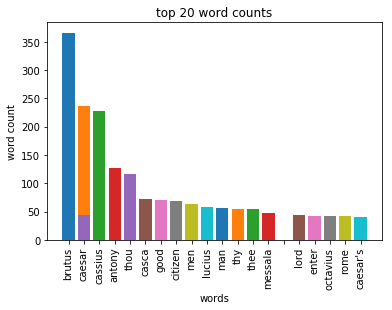

In [33]:
# make a bar chart
for i in range(len(word_count_list)):
    plt.bar(word_count_list [i][0], word_count_list [i][1] );
    plt.xticks(rotation=90)
    plt.xlabel('words')
    plt.ylabel('word count')
    plt.title('top 20 word counts')


### Using partitions for parallelization

In order to make your code more efficient, you want to use all of the available processing power, even on a single laptop. If your machine has multiple cores, you can tune the number of partitions to use all of them! From http://www.stat.berkeley.edu/scf/paciorek-spark-2014.html:

>You want each partition to be able to fit in the memory availalbe on a node, and if you have multi-core nodes, you want that as many partitions as there are cores be able to fit in memory.

>For load-balancing you'll want at least as many partitions as total computational cores in your cluster and probably rather more partitions. The Spark documentation suggests 2-4 partitions (which they also seem to call slices) per CPU. Often there are 100-10,000 partitions. Another rule of thumb is that tasks should take at least 100 ms. If less than that, you may want to repartition to have fewer partitions.

In [34]:
shakesrdd=sc.textFile("./sparklect/shakes/*.txt", minPartitions=4)

In [35]:
shakesrdd.take(10)

['XXXX',
 "A MIDSUMMER NIGHT'S DREAM",
 '',
 'by William Shakespeare',
 '',
 '',
 '',
 '',
 'Persons Represented.',
 '']

Now calculate the top 20 words in all of the files that you just read.

In [36]:
#number of words in text
print(shakesrdd.flatMap(lambda line: line.split()).count(),"word count")
#get top 20 ordered word counts of words lower cased, with puctuation and stop words removed. 
shakesrdd.flatMap( lambda line: line.split() ).map( lambda word: word.strip(punctuation).lower() ).filter( lambda word: word not in stopwords ).map( lambda w: (w, 1) ).reduceByKey( lambda x,y: x+y ).takeOrdered(20, lambda x: x[1] * -1 )


364841 word count


[('thou', 2129),
 ('thy', 1548),
 ('sir', 1320),
 ('thee', 1257),
 ('good', 1200),
 ('lord', 1116),
 ('love', 939),
 ('enter', 892),
 ('hath', 793),
 ('man', 783),
 ('make', 654),
 ('tis', 612),
 ('king', 596),
 ('give', 574),
 ('duke', 568),
 ('speak', 528),
 ('brutus', 478),
 ('time', 471),
 ('exit', 443),
 ('exeunt', 443)]

## Optional topic 1: DataFrames

Pandas and Spark dataframes can be easily converted to each other, making it easier to work with different data formats. This section shows some examples of each.

Convert Spark DataFrame to Pandas

`pandas_df = spark_df.toPandas()`

Create a Spark DataFrame from Pandas

`spark_df = context.createDataFrame(pandas_df)`

Must fit in memory.

![](https://ogirardot.files.wordpress.com/2015/05/rdd-vs-dataframe.png?w=640&h=360)

VERY IMPORTANT: DataFrames in Spark are like RDD in the sense that they’re an immutable data structure.

In [37]:
df=pd.read_csv("sparklect/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Convert this pandas dataframe to a Spark dataframe

In [38]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)
sparkdf = sqlsc.createDataFrame(df)
sparkdf

DataFrame[Gender: string, Height: double, Weight: double]

In [39]:
sparkdf.show(5)

+------+-----------------+----------------+
|Gender|           Height|          Weight|
+------+-----------------+----------------+
|  Male|  73.847017017515|241.893563180437|
|  Male|68.78190404589029|  162.3104725213|
|  Male|74.11010539178491|  212.7408555565|
|  Male| 71.7309784033377|220.042470303077|
|  Male| 69.8817958611153|206.349800623871|
+------+-----------------+----------------+
only showing top 5 rows



In [40]:
type(sparkdf.Gender)

pyspark.sql.column.Column

In [41]:
# You can't call .map() on a DataFrame directly - you first have to convert it into an RDD
temp = sparkdf.rdd.map(lambda r: r.Gender)
print (type(temp))
temp.take(10)

<class 'pyspark.rdd.PipelinedRDD'>


['Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male']

## Optional topic 2: Machine Learning using Spark



In [42]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.regression import LabeledPoint

Now create a data set from the Spark dataframe

In [43]:
data= sparkdf.rdd.map( lambda row: LabeledPoint(row.Gender=='Male',[row.Height, row.Weight]) )
data.take(5)

[LabeledPoint(1.0, [73.8470170175,241.89356318]),
 LabeledPoint(1.0, [68.7819040459,162.310472521]),
 LabeledPoint(1.0, [74.1101053918,212.740855557]),
 LabeledPoint(1.0, [71.7309784033,220.042470303]),
 LabeledPoint(1.0, [69.8817958611,206.349800624])]

In [44]:
data2=sparkdf.rdd.map(lambda row: LabeledPoint(row[0]=='Male',row[1:]))
data2.take(1)[0].label, data2.take(1)[0].features

(1.0, DenseVector([73.847, 241.8936]))

Split the data set into training and test sets

In [45]:
train, test = data.randomSplit([0.7,0.3])
train.cache()
test.cache()

PythonRDD[69] at RDD at PythonRDD.scala:48

In [46]:
type(train)

pyspark.rdd.PipelinedRDD

Train the logistic regression model using MLIB

In [47]:
model = LogisticRegressionWithLBFGS.train(train)

In [48]:
model.weights

DenseVector([-0.4821, 0.1981])

Run it on the test data

In [49]:
results = test.map(lambda lp: (lp.label, float(model.predict(lp.features))))
print (results.take(10))
type(results)                       

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0)]


pyspark.rdd.PipelinedRDD

Measure accuracy and other metrics

In [50]:
test_accuracy= results.filter( lambda x : x[0]==x[1] ).count() / float( results.count() )
test_accuracy

0.9141803553469662

In [51]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
metrics = BinaryClassificationMetrics(results)

In [52]:
print (type(metrics))
metrics.areaUnderROC

<class 'pyspark.mllib.evaluation.BinaryClassificationMetrics'>


0.9142424610238982

In [53]:
type(model)

pyspark.mllib.classification.LogisticRegressionModel

In [54]:
!rm -rf mylogistic.model

In [55]:
model.save(sc, "mylogistic.model")

The pipeline API automates a lot of this stuff, allowing us to work directly on dataframes.

Also see:

- http://jordicasanellas.weebly.com/data-science-blog/machine-learning-with-spark
- http://spark.apache.org/docs/latest/mllib-guide.html
- http://www.techpoweredmath.com/spark-dataframes-mllib-tutorial/
- http://spark.apache.org/docs/latest/api/python/
- http://spark.apache.org/docs/latest/programming-guide.html

`rdd.saveAsTextFile()` saves an RDD as a string.

## Optional Topic 3: Your Turn at Machine Learning! :)

For this exercise, we're going to use one of the datasets we've already worked with: the Boston House Prices dataset. We're going to try a couple of regression algorithms, but from the SparkML library this time.

Before you proceed, make sure to do an overview of the documentation: 
http://spark.apache.org/docs/latest/api/python/pyspark.ml.html

In [56]:
# All imports go here
from pyspark.ml.tuning import ParamGridBuilder , CrossValidator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.regression import LinearRegression , RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.regression import LabeledPoint 
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer , VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.linalg import DenseVector
from pyspark.sql import SparkSession 
import pyspark


%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
from scipy.stats import pearsonr
# special matplotlib argument for improved plots
from matplotlib import rcParams
plt.style.use('fivethirtyeight')

First, we have to load the dataset, which resides as a CSV file in the folder for this exercise.

In [57]:
#set schema to match data from csv
schema= StructType([\
                    StructField("crim", DoubleType() , True ),\
                    StructField( "zm" , DoubleType() , True ),\
                    StructField("indus" , DoubleType() , True),\
                   StructField("chas" , DoubleType() , True),\
                   StructField("nox" , DoubleType() , True),\
                   StructField("rm" , DoubleType() , True),\
                   StructField("age" , DoubleType() , True),\
                   StructField("dis" , DoubleType() , True),\
                   StructField("rad" , DoubleType() , True),\
                   StructField("tax" , DoubleType() , True),\
                   StructField("ptratio" , DoubleType() , True),\
                   StructField("black" , DoubleType() , True),\
                   StructField("lstat" , DoubleType() , True),\
                   StructField("medv" , DoubleType() , True)])

In [58]:
#create pyspark sql context
sqlsc=SQLContext(sc)

#read csv into data frame using schema
boston_data= sqlsc.read.format("com.databricks.spark.csv").load('sparklect/boston.csv', schema=schema)

Inspect the data to make sure everything is loaded properly.

In [59]:
boston_data.show(2)

+-------+----+-----+----+-----+-----+----+----+----+-----+-------+-----+-----+----+
|   crim|  zm|indus|chas|  nox|   rm| age| dis| rad|  tax|ptratio|black|lstat|medv|
+-------+----+-----+----+-----+-----+----+----+----+-----+-------+-----+-----+----+
|   null|null| null|null| null| null|null|null|null| null|   null| null| null|null|
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|4.09| 1.0|296.0|   15.3|396.9| 4.98|24.0|
+-------+----+-----+----+-----+-----+----+----+----+-----+-------+-----+-----+----+
only showing top 2 rows



In [60]:
#clean null values 
boston_data2 = boston_data.dropna(thresh=2)

#check again
boston_data2.show(5)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|   crim|  zm|indus|chas|  nox|   rm| age|   dis|rad|  tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421|78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185|61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998|45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147|54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
only showing top 5 rows



#### We'll first have to vectorize the features

In [61]:
#map medv to position 1 as the label and map the rest of the columns to array in position 2 as features
boston_input = boston_data2.rdd.map(lambda x :  (x[13], DenseVector( x [:-1] ) ) ) 

In [62]:
#create a spark dataframe with the label and features in a dense vector format
dfb= sqlsc.createDataFrame( boston_input , ['label' , "features" ] )

In [63]:
dfb.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
| 24.0|[0.00632,18.0,2.3...|
| 21.6|[0.02731,0.0,7.07...|
+-----+--------------------+
only showing top 2 rows



In [64]:
#split into test and train set. seed random number for reproduction
( train , test ) = dfb.randomSplit( [0.7, 0.3] , seed = 42)

In [65]:
#label classifier (needs to match appName in SparkSession)
classifier = LinearRegression ( labelCol='label' ,featuresCol = 'features' )

As the next step, fit a Linear Regression model on the training set.

In [66]:
lrmodel = classifier.fit(train) #train regression

In [67]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s \n" % str(lrmodel.coefficients))
print("Intercept: %s \n" % str(lrmodel.intercept))

Coefficients: [-0.0716468068544,0.0701831477096,0.0366147997809,3.06051718586,-19.8784301815,3.17580660024,-0.0124969410762,-1.67189388206,0.35078291917,-0.013794116354,-1.00027281038,0.0115316169073,-0.483341436025] 

Intercept: 42.42036702454656 



Now validate the model on the test set, and check the Root Mean Squared Error.

In [68]:
#save results from model and print training history
trainingSummary = lrmodel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

#print residuals
trainingSummary.residuals.show()

#print results 
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|  -3.954966955621188|
|   -1.21927485611873|
|   8.470450403739122|
| -11.131882080149463|
| -2.6237225359836485|
|  -2.505524459866673|
| -0.5123408294550327|
| -5.4807513074814835|
|   4.065806845552009|
| -1.8152629276087033|
|  -5.874299459553361|
|  2.9226274415690785|
| -1.2343693121561117|
|-0.02267896266777...|
|  3.2275825431507705|
|   0.578420268417954|
| -3.2805919610389687|
| -4.3637284746946765|
|  -1.651669263671426|
|  -6.574984450415339|
+--------------------+
only showing top 20 rows

RMSE: 4.551090
r2: 0.743817


The Root Mean Square Error (RMSE) is better if it is low. It is a measure of the error between the observed (actual) value (house price here) and the predicted value (prediction column here). 

The R Squared (R2) is between 0 and 1 with one being better. It measures how will the fitted linear line matches the data. 

We do have have a bit of error in our model. However, the R2 is fairly high which is encouraging that are model is doing okay. We can say from this that our model with these variables explains 73.4 percent of the variability between observed and predicted prices. 


## Now lets plot the residuals

In [69]:
#get fitted values of training set to plot against residuals
predict_train = lrmodel.transform( train )
predict_train.show(5)

+-----+--------------------+-------------------+
|label|            features|         prediction|
+-----+--------------------+-------------------+
|  5.0|[38.3518,0.0,18.1...|  8.954966955621188|
|  7.0|[0.18337,0.0,27.7...|   8.21927485611873|
|  7.0|[45.7461,0.0,18.1...|-1.4704504037391217|
|  7.2|[14.2362,0.0,18.1...| 18.331882080149462|
|  7.2|[16.8118,0.0,18.1...|  9.823722535983649|
+-----+--------------------+-------------------+
only showing top 5 rows



In [70]:
# get residuals form training summary and save as list
residuals = trainingSummary.residuals.select("residuals").rdd.map(lambda x: x[0]).collect()
# get the fitted predictions for the training prices
fitted_train = predict_train.select("prediction").rdd.map(lambda x: x[0]).collect()

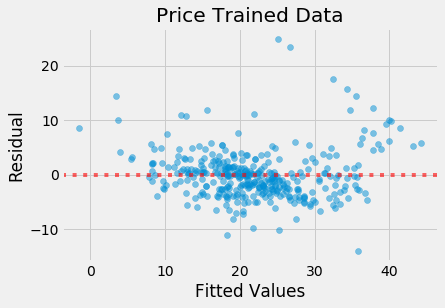

In [71]:
#create a scatter plot of fitted values against residuals
plt.scatter(fitted_train,residuals,alpha=.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Price Trained Data")
plt.axhline(0,color='r',alpha=.6, linestyle=':',label='estimated regression line')
plt.show()

The residuals "bounce randomly" around the y=0 or the expected regression line. This suggests that the assumption that the relationship is linear is reasonable.

The residuals roughly form a "horizontal band" around the y=0 line. This suggests that the variances of the error terms are equal. We do not seee a  bell shape (heteroscedastic errors); a violation of the assumption of no multicollinearity.

We do have some outliers in our data.

## Next we look at the test set predictions

In [72]:
# make some predictions
prediction_lr =lrmodel.transform(test)
prediction_lr.show(5)

+-----+--------------------+------------------+
|label|            features|        prediction|
+-----+--------------------+------------------+
|  5.0|[67.9208,0.0,18.1...|11.214869767468617|
|  5.6|[25.0461,0.0,18.1...|13.284671010624187|
|  6.3|[9.91655,0.0,18.1...|12.141088804888177|
|  8.3|[24.8017,0.0,18.1...|14.518798793190896|
|  8.5|[7.67202,0.0,18.1...| 16.97352364116592|
+-----+--------------------+------------------+
only showing top 5 rows



In [73]:
#lets gather some predictions and actual house prices to plot a visual
prediction=prediction_lr.select("prediction").rdd.map(lambda x: x[0]).collect()
prices=prediction_lr.select("label").rdd.map(lambda x: x[0]).collect()

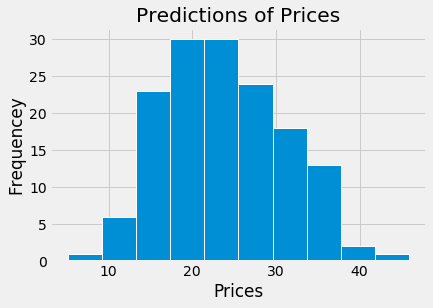

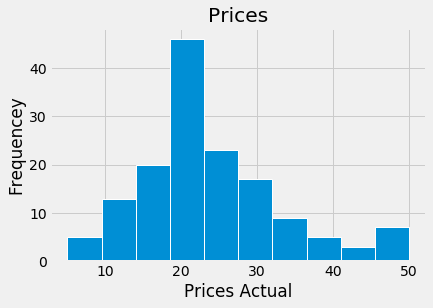

In [74]:
#Make a histogram of the predictions
plt.hist(prediction , edgecolor='w', lw=1)
plt.title("Predictions of Prices")
plt.xlabel("Prices")
plt.ylabel("Frequencey")
plt.show()

#make a histogram of the actual prices
plt.hist(prices ,edgecolor='w', lw=1)
plt.title("Prices")
plt.xlabel("Prices Actual")
plt.ylabel("Frequencey")
plt.show()

We see that our prediction are close to the same shape and centered near the same mean as the actual prices. Note that the actual prices look to have some outliers. We might be able to improve our predictions by removing outliers from the model. 

#### Let's compare Linear Regression with a more powerful algorithm - the Random Forest. As the Random Forest has several hyperparameters that can be tuned for maximum accuracy, we're going to need to use k-fold Cross Validation.

In [75]:
#create a spark dataframe with the label and features in a dense vector format
dfb= sqlsc.createDataFrame( boston_input , ['label' , "features" ] )
dfb.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
| 24.0|[0.00632,18.0,2.3...|
| 21.6|[0.02731,0.0,7.07...|
+-----+--------------------+
only showing top 2 rows



In [76]:
#split into test and train set. seed random number for reproduction
( train , test ) = dfb.randomSplit( [0.7, 0.3] , seed = 42)

In [77]:
#create  Random Forest Regressor
regressor = RandomForestRegressor ( labelCol='label' ,featuresCol = 'features' ,seed=42)

In [78]:
rfmodel = regressor.fit(train) #train regression

In [79]:
# Make predictions.
predictions = rfmodel.transform(test)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

#set evaluator to measure rmse, save and print
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g \n" % rmse)

#set evaluator to measure R^2, save and print
evaluator= RegressionEvaluator(predictionCol='prediction', labelCol='label', metricName='r2')
r2 = evaluator.evaluate(predictions)
print("R Squaered (R2) on test data = %g" % r2)

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|11.206520189509174|  5.0|[67.9208,0.0,18.1...|
|10.955958921142178|  5.6|[25.0461,0.0,18.1...|
|12.277771300585002|  6.3|[9.91655,0.0,18.1...|
|12.908865875847798|  8.3|[24.8017,0.0,18.1...|
|13.765108816688581|  8.5|[7.67202,0.0,18.1...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 3.62105 

R Squaered (R2) on test data = 0.855461


First, set up a grid for the hyperparameter search.

Now, with a Random Forest regressor using k-fold Cross Validation, and find the optimal combination of hyperparameters.

In [80]:
#create an instance of the Random Forest Regressor
rf = RandomForestRegressor (seed=42)

In [81]:
#create a grid to search over
estimatorParam = ParamGridBuilder() \
.addGrid(rf.maxDepth, [1, 6, 8]) \
.addGrid(rf.numTrees, [5, 10, 20, 50]) \
.addGrid(rf.featureSubsetStrategy , ["sqrt" ,"all"])\
.addGrid(rf.impurity, ["variance"]) \
.build()

#creat evaluator designate title of label column, prediction column and metric to evaluate on
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")  

In [82]:
#create a cross validator with 3 folds and predefined estimator, grid, and evaluator
crossval = CrossValidator(estimator=rf,  
                         estimatorParamMaps=estimatorParam,
                         evaluator=evaluator,
                         numFolds=3  ,seed=42)
# fit the training data with cross validation
cvmodel = crossval.fit(train)  

In [83]:
print ('Average cross-validation metrics for each paramMap in CrossValidator.estimatorParamMaps: \n\n' ,cvmodel.avgMetrics )

predictions_cvmodel = cvmodel.transform(train)

print ("\n R2 for training set best cross validation score:", evaluator.evaluate(cvmodel.transform(train)) )



Average cross-validation metrics for each paramMap in CrossValidator.estimatorParamMaps: 

 [0.43206123249896844, 0.4676312020200657, 0.451792324342991, 0.5258725426961681, 0.4922282339111115, 0.5166183036265892, 0.4797059575130439, 0.5220926258317795, 0.7793149508389137, 0.8155770620731927, 0.7912238340949596, 0.8106846134303799, 0.7873216895114763, 0.8072245482709914, 0.7869303208685989, 0.8251827943161649, 0.7867186865350049, 0.8138157954024152, 0.7931102483080088, 0.8164888962357952, 0.7891951846543035, 0.8125676786295449, 0.7973973254628699, 0.8305352510322905]

 R2 for training set best cross validation score: 0.9726911426724641


We see the spread of cross-validation scores for R^2 metric. 

#### Finally, validate the model on the test set and check the Root Mean Squared Error again.

In [84]:
# Make predictions.
best_predictions_cv = cvmodel.bestModel.transform(test)

# Select example rows to display.
best_predictions_cv.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(best_predictions_cv)
print("Root Mean Squared Error (RMSE) on test data = %g \n" % rmse)

# Select (prediction, true label) and compute the coefficient of determination (R2)
evaluator= RegressionEvaluator(predictionCol='prediction', labelCol='label', metricName='r2')

r2 = evaluator.evaluate(best_predictions_cv)
print("R Squaered (R2) on test data = %g" % r2)

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|10.228156654456656|  5.0|[67.9208,0.0,18.1...|
| 8.837214966079673|  5.6|[25.0461,0.0,18.1...|
|10.504834171384168|  6.3|[9.91655,0.0,18.1...|
|  11.4762987550295|  8.3|[24.8017,0.0,18.1...|
|13.699253842631576|  8.5|[7.67202,0.0,18.1...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 3.12591 

R Squaered (R2) on test data = 0.892287


We see that are tuning did improve our model. We are still overfitting badly but not as bad as well as getting a better R-squared result on the test set (compared to .0.855461)



## Optional Topic 4: Model Your Capstone Dataset


If you have time, load up the cleaned dataset from one of your capstone projects. Do you remember which algorithm and the accompanying combination of hyperparameters did the best job? For practice, try and implement the same model in SparkML.

In [85]:
# Stop Spark
sc.stop()